<a href="https://colab.research.google.com/github/lazy-bro/Boom_Models/blob/main/CIFAR10_Image_Classification_using_CNN/CIFAR10_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.layers import Dropout, BatchNormalization

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
Y_test.shape

(10000, 1)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([[[ 28,  35,  39],
        [ 30,  34,  44],
        [ 33,  44,  47],
        ...,
        [ 43,  56,  45],
        [ 52,  64,  53],
        [ 46,  58,  47]],

       [[ 27,  30,  38],
        [ 27,  28,  41],
        [ 21,  31,  39],
        ...,
        [112, 136,  97],
        [117, 140, 101],
        [115, 138, 100]],

       [[ 34,  36,  42],
        [ 33,  33,  43],
        [ 24,  30,  40],
        ...,
        [175, 208, 143],
        [177, 209, 144],
        [176, 208, 143]],

       ...,

       [[142, 176, 118],
        [142, 176, 118],
        [150, 184, 127],
        ...,
        [134, 175, 119],
        [128, 168, 112],
        [134, 175, 119]],

       [[140, 176, 124],
        [145, 180, 129],
        [150, 186, 134],
        ...,
        [131, 170, 119],
        [130, 170, 119],
        [122, 162, 111]],

       [[134, 171, 123],
        [136, 171, 124],
        [136, 171, 124],
        ...,
        [106, 144, 100],
        [104, 142,  99],
        [101, 140,  96]]], dtype=uint8)
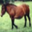

In [6]:
X_train[7]

In [7]:
model = keras.Sequential()

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

In [11]:
datagen.fit(X_train)

In [12]:
model.add(keras.layers.Conv2D(
    32,
    (3,3),
    activation="relu",
    input_shape=(32,32,3),
    padding='same'
)
)
model.add(BatchNormalization())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(keras.layers.Conv2D(
    32,
    (3,3),
    activation="relu",
    padding='same'
)
)

In [14]:
model.add(keras.layers.MaxPooling2D(
    pool_size=(2, 2)
))
model.add(Dropout(0.25))

In [15]:
model.add(keras.layers.Conv2D(
    64,
    (3,3),
    activation="relu",
    padding='same'
)
)
model.add(BatchNormalization())

In [16]:
model.add(keras.layers.Conv2D(
    64,
    (3,3),
    activation="relu",
    padding='same'
)
)

In [17]:
model.add(keras.layers.MaxPooling2D(
    pool_size=(2, 2)
))
model.add(Dropout(0.25))

In [18]:
model.add(keras.layers.Flatten())

In [19]:
model.add(keras.layers.Dense(512, activation="relu"))

In [20]:
model.add(Dropout(0.5))

In [21]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,746 (8.27 MB)

 Trainable params: 2,168,554 (8.27 MB)

 Non-trainable params: 192 (768.00 B)

In [23]:
model.compile(
    optimizer="adam",
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
callback1 = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5
)

In [25]:
model.fit(
    x=X_train,
    y=Y_train,
    batch_size=64,
    epochs=100,
    verbose="auto",
    #callbacks=[callback1],
    validation_data=(X_test, Y_test)
)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.2926 - loss: 2.1636 - val_accuracy: 0.4832 - val_loss: 1.3959
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4886 - loss: 1.3909 - val_accuracy: 0.5326 - val_loss: 1.3355
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5902 - loss: 1.1581 - val_accuracy: 0.6710 - val_loss: 0.9451
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6494 - loss: 1.0068 - val_accuracy: 0.7054 - val_loss: 0.8668
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6811 - loss: 0.9114 - val_accuracy: 0.7309 - val_loss: 0.7955
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7071 - loss: 0.8432 - val_accuracy: 0.7328 - val_loss: 0.7817
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7337 - loss: 0.7712 - val_accuracy: 0.7255 - val_loss: 0.8084
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7516 - loss: 0.7084 - v

In [26]:
model.evaluate(
    x=X_test,
    y=Y_test,
    batch_size=64,
    verbose="auto")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8278 - loss: 0.8263


[0.8068011999130249, 0.8269000053405762]

In [27]:
model.predict(
    x=X_test,
    batch_size=64,
    verbose="auto",
    callbacks=[callback1]
    )

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[1.2467331e-09, 1.8139148e-11, 1.1237407e-07, ..., 6.1169854e-11,
        1.0970027e-09, 4.3105545e-12],
       [2.0930526e-13, 2.6860831e-05, 2.3683582e-24, ..., 6.0636310e-34,
        9.9997318e-01, 9.9708872e-18],
       [3.5090173e-09, 5.6975225e-09, 4.2021240e-20, ..., 5.2360301e-22,
        1.0000000e+00, 3.7697775e-13],
       ...,
       [7.2683908e-16, 2.4971373e-16, 4.5623455e-08, ..., 2.2593144e-07,
        7.0544845e-13, 7.9016688e-14],
       [3.9888253e-12, 1.0000000e+00, 3.0134369e-14, ..., 1.2784217e-19,
        6.6473704e-13, 9.2856660e-11],
       [7.9028146e-22, 4.7770757e-28, 1.1106243e-17, ..., 1.0000000e+00,
        7.8498502e-28, 4.4366957e-23]], dtype=float32)

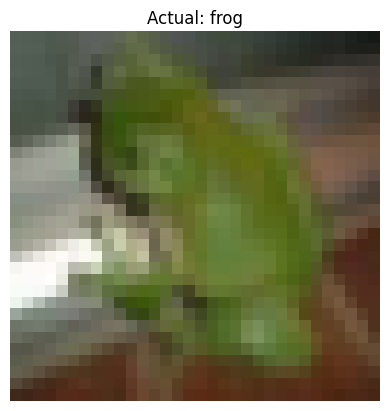

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: frog


In [38]:
# CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Pick a test image index (you can change the number)
index = 7
test_image = X_test[index]
true_label = Y_test[index][0]  # original label

# Show the image
plt.imshow(test_image)
plt.title(f"Actual: {class_names[true_label]}")
plt.axis('off')
plt.show()

# Reshape image for prediction: (1, 32, 32, 3)
img_array = np.expand_dims(test_image, axis=0)

# Predict
pred_probs = model.predict(img_array)
predicted_label = np.argmax(pred_probs)

print(f"Predicted class: {class_names[predicted_label]}")